In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io 
import os


In [3]:
##data loading

images=[]
labels=[]
files= os.listdir(r'processed_data')
for pimg in files :
    image=io.imread(f'processed_data\\{pimg}').ravel()/255
    label=int(pimg.split('.')[0][-1])
    images.append(image)
    labels.append(label)

In [4]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.25,random_state=42)

In [5]:
xtrain=np.array([image for image in x_train])
ytrain=np.array(y_train)
xtrain[0]

array([0.91372549, 0.91372549, 0.91372549, ..., 0.89019608, 0.89019608,
       0.89019608])

In [6]:
xtest=np.array([image for image in x_test])
ytest=np.array(y_test)

Modeling

In [14]:
228*228//2

25992

In [7]:
from sklearn.neural_network import MLPClassifier 

NN=MLPClassifier(hidden_layer_sizes=(784,228),activation='logistic',verbose=2)
NN.fit(xtrain,ytrain.ravel())

Iteration 1, loss = 1.13828744
Iteration 2, loss = 1.55889214
Iteration 3, loss = 1.38018573
Iteration 4, loss = 1.18229578
Iteration 5, loss = 1.10053386
Iteration 6, loss = 1.18541129
Iteration 7, loss = 1.24353862
Iteration 8, loss = 1.22869890
Iteration 9, loss = 1.19183264
Iteration 10, loss = 1.14590824
Iteration 11, loss = 1.10806882
Iteration 12, loss = 1.10366297
Iteration 13, loss = 1.13194514
Iteration 14, loss = 1.15660060
Iteration 15, loss = 1.15532826
Iteration 16, loss = 1.13661102
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='logistic', hidden_layer_sizes=(784, 228), verbose=2)

In [9]:
ypred=NN.predict(xtest)
ytest==ypred

array([False,  True,  True,  True,  True, False, False,  True, False,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False, False,  True, False, False,  True,  True,
       False, False, False])

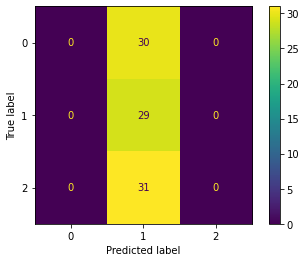

In [11]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(NN,xtrain,ytrain)